# Repaso de analisis de Fourier (dominio de las frequencias)

In [1]:
# importamos las librerias a usar
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Tiempo')

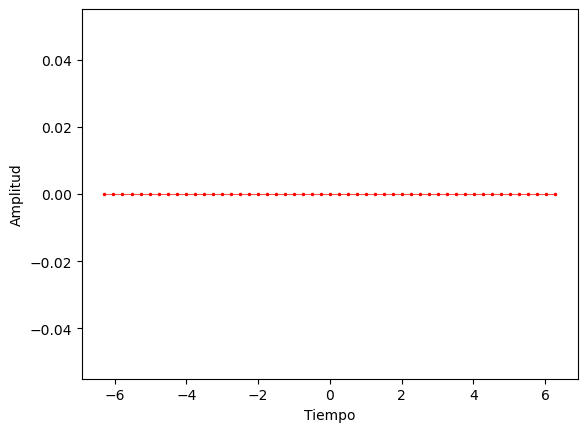

In [27]:
# tamaño de los vectores
n_muestras = 51

# eje del timepo
t = np.linspace(-2.*np.pi, 2.*np.pi, n_muestras)

# eje de la amplitud
x = np.zeros((n_muestras), dtype=float)

# hacemos la figura de la señal
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(t, x, lw=0.5, marker='.', markersize=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo')


Text(0.5, 0, 'Tiempo')

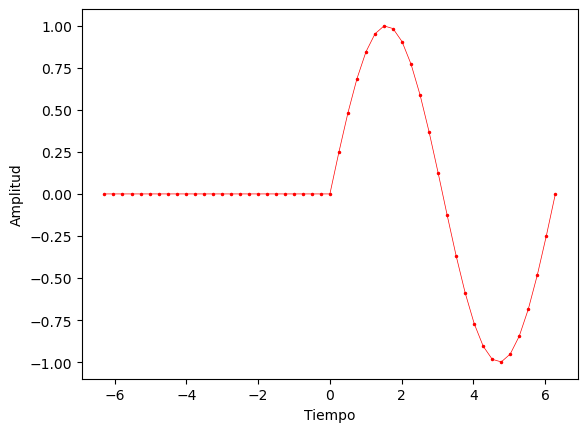

In [28]:
# una señal se registra después de t>0
for i in range(len(t)):
    if t[i] > 0:
        x[i] = np.sin(t[i])

# hacemos la figura de la señal
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(t, x, lw=0.5, marker='.', markersize=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo')


Text(0.5, 0, 'Tiempo')

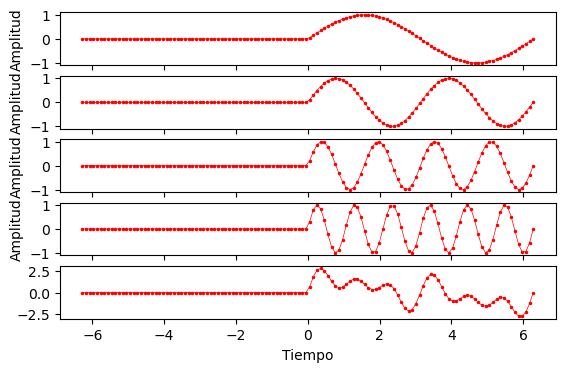

In [38]:
# Esta señeal es sencilla, pero imaginemos que esta señal podría se la suma de muchas señales sencillas

# tamaño de los vectores
n_muestras = 124

# eje del timepo
t = np.linspace(-2.*np.pi, 2.*np.pi, n_muestras)
# eje de la amplitud
x = np.zeros((n_muestras), dtype=float)
x_sum = np.zeros((n_muestras), dtype=float)

# Diferentes periodos de la señal
periodos = [1., 2., 4., 6.]

# hacemos la figura de la señal
fig1 = plt.figure(1)

for p in range(len(periodos)):
    for i in range(len(t)):
        if t[i] > 0:
            x[i] = np.sin(t[i]*periodos[p])
            x_sum[i] = x_sum[i] + x[i]
    ax1 = fig1.add_subplot(len(periodos)+2, 1, p+1)
    ax1.plot(t, x, lw=0.5, marker='.', markersize=3, c='red')
    ax1.set_ylabel('Amplitud')
    #if p == len(periodos) + 1:
ax1 = fig1.add_subplot(len(periodos)+2, 1, len(periodos)+1)
ax1.plot(t, x_sum, lw=0.5, marker='.', markersize=3, c='red')    
ax1.set_xlabel('Tiempo')


Text(0.5, 0, 'Tiempo')

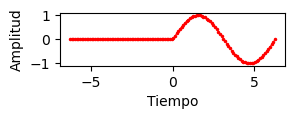

In [67]:
# Cada una de estas señales se puedes describir en el dominio de las frequencias
# es facil comprender la representación de cada una de ellas al entender cada
# cuanto intervalo de timepo estas se repiten

# tamaño de los vectores
n_muestras = 124

# eje del timepo
t = np.linspace(-2.*np.pi, 2.*np.pi, n_muestras)
# eje de la amplitud
x = np.zeros((n_muestras), dtype=float)

# una señal se registra después de t>0
for i in range(len(t)):
    if t[i] > 0:
        x[i] = np.sin(t[i]*periodos[0])

# hacemos la figura de la señal
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(len(periodos)+2,2,1)
ax1.plot(t, x, lw=0.5, marker='.', markersize=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo')



(-2.0, 2.0)

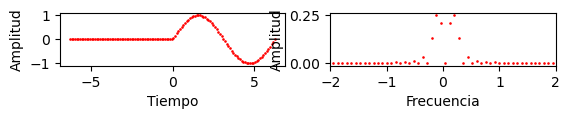

In [68]:
# Dominio de la frequencia
dt = t[1]-t[0]

# valores básicos del dominio de las frecuencias
freq_max = 1 / (2*dt)
freq_muestreo = 1 / (2*t[-1])

# eje de las frecuencias
freq = np.linspace(-freq_max, freq_max, n_muestras)

señal_en_freq = np.fft.fft(x, n_muestras)
espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(len(periodos)+2,2,1)
ax1.scatter(t, x, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo')

ax1 = fig1.add_subplot(len(periodos)+2,2,2)
ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Frecuencia')
ax1.set_xlim([-2, 2])



Text(0.5, 0, 'Frecuencia [Hz]')

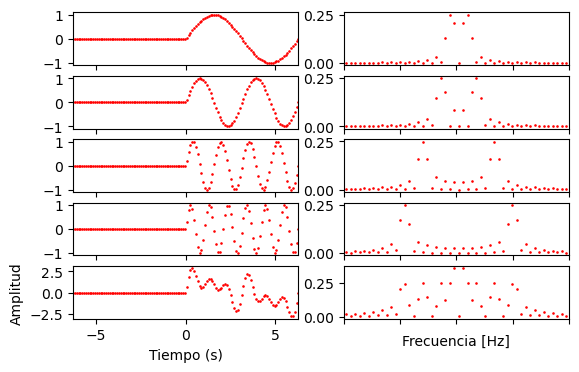

In [90]:
# Diferentes periodos de la señal
periodos = [1., 2., 4., 6.]

# para sumar todas las señales
x_sum = np.zeros((n_muestras), dtype=float)


# preparamos la grafica
fig1 = plt.figure(1)

k = 0
# una señal se registra después de t>0
for p in range(len(periodos)):
    for i in range(len(t)):
        if t[i] > 0:
            x[i] = np.sin(t[i]*periodos[p])
            x_sum[i] = x_sum[i] + x[i]
    
    señal_en_freq = np.fft.fft(x, n_muestras)
    espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2-1)
    ax1.scatter(t, x, marker='.', s=3, c='red')
    ax1.set_xlim([-2*np.pi, 2*np.pi])
    ax1.set_xticklabels([])
    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2)
    ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
    ax1.set_xticklabels([])
    ax1.set_xlim([-2, 2])
    k = 1

señal_en_freq = np.fft.fft(x_sum, n_muestras)
espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+1)
ax1.scatter(t, x_sum, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo (s)')
ax1.set_xlim([-2*np.pi, 2*np.pi])

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+2)
ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
ax1.set_xticklabels([])
ax1.set_xlim([-2, 2])
ax1.set_xlabel('Frecuencia [Hz]')



Text(0.5, 0, 'Frecuencia [Hz]')

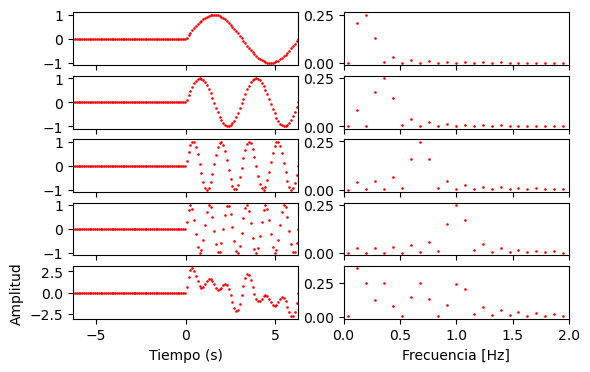

In [101]:
# Diferentes periodos de la señal
periodos = [1., 2., 4., 6.]

# para sumar todas las señales
x_sum = np.zeros((n_muestras), dtype=float)


# preparamos la grafica
fig1 = plt.figure(1)

k = 0
# una señal se registra después de t>0
for p in range(len(periodos)):
    for i in range(len(t)):
        if t[i] > 0:
            x[i] = np.sin(t[i]*periodos[p])
            x_sum[i] = x_sum[i] + x[i]
    
    señal_en_freq = np.fft.fft(x, n_muestras)
    espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2-1)
    ax1.scatter(t, x, marker='.', s=3, c='red')
    ax1.set_xlim([-2*np.pi, 2*np.pi])
    ax1.set_xticklabels([])
    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2)
    ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
    ax1.set_xticklabels([])
    ax1.set_xlim([0, 2])
    k = 1

señal_en_freq = np.fft.fft(x_sum, n_muestras)
espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+1)
ax1.scatter(t, x_sum, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo (s)')
ax1.set_xlim([-2*np.pi, 2*np.pi])

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+2)
ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
ax1.set_xlim([0, 2])
ax1.set_xlabel('Frecuencia [Hz]')



Text(0.5, 0, 'Frecuencia [Hz]')

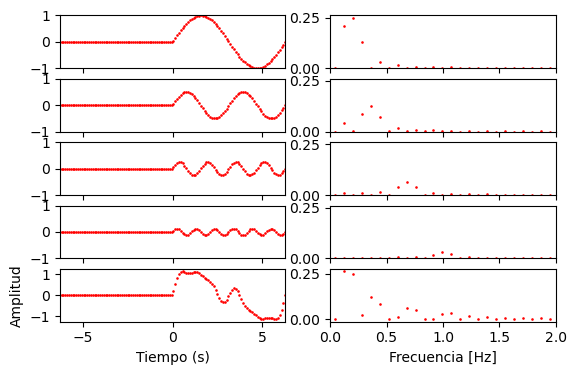

In [102]:
# Diferentes periodos de la señal
periodos = [1., 2., 4., 6.]

# Diferentes coeficientes, diferente energia viaja en diferentes frecuencias
coeficientes = [1., 0.5, 0.25, 0.125]

# para sumar todas las señales
x_sum = np.zeros((n_muestras), dtype=float)


# preparamos la grafica
fig1 = plt.figure(1)

k = 0
# una señal se registra después de t>0
for p in range(len(periodos)):
    for i in range(len(t)):
        if t[i] > 0:
            x[i] = coeficientes[p]*np.sin(t[i]*periodos[p])
            x_sum[i] = x_sum[i] + x[i]
    
    señal_en_freq = np.fft.fft(x, n_muestras)
    espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2-1)
    ax1.scatter(t, x, marker='.', s=3, c='red')
    ax1.set_xlim([-2*np.pi, 2*np.pi])
    ax1.set_ylim([-1, 1])
    ax1.set_xticklabels([])
    ax1 = fig1.add_subplot(len(periodos)+2,2,(p+1)*2)
    ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
    ax1.set_xticklabels([])
    ax1.set_xlim([0, 2])
    ax1.set_ylim([0, 0.26])
    k = 1

señal_en_freq = np.fft.fft(x_sum, n_muestras)
espectro_amp = np.abs(np.fft.fftshift(señal_en_freq)) / n_muestras

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+1)
ax1.scatter(t, x_sum, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo (s)')
ax1.set_xlim([-2*np.pi, 2*np.pi])

ax1 = fig1.add_subplot(len(periodos)+2,2,len(periodos)*2+2)
ax1.scatter(freq, espectro_amp, marker='.', s=3, c='red')
ax1.set_xlim([0, 2])
ax1.set_xlabel('Frecuencia [Hz]')



Text(0.5, 0, 'Frecuencia')

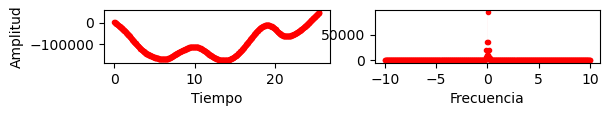

In [175]:
# Entonces ahora hagamoslo para un terremoto de verdad

from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

# The following example illustrates how to request and 
# plot 60 minutes of the "BHZ" channel of station Albuquerque, 
# New Mexico ("ANMO") of the Global Seismograph Network 
# ("IU") for an seismic event around 2010-02-27 06:45 (UTC). 
# Results are returned as a Stream object. See the get_waveforms_bulk() 
# method for information on how to send multiple requests simultaneously to avoid unnecessary network overhead.

t = UTCDateTime("2010-02-27T07:05:00.000")
#st = client.get_waveforms("IU", "ANMO", "00", "BHZ", t, t + 1000)
st.taper(max_percentage=0.15, type='hann')

#t = UTCDateTime("2010-02-27T07:05:00.000")
#st.plot( starttime=t, endtime=t+1000)

# mis muestras son n_muestras = 72000
n_muestras_orig = 20000

n_muestras = 512  # 2^15

# dt = t[1]-t[2]
dt = 1/20    # 60 min * 60 sec * 20 muestras  = 72000
n1 = 2500
senal = np.zeros((n_muestras), dtype=float)
senal[0:n_muestras] = st[0].data[n1:n1+n_muestras]
t = np.linspace(0, (n_muestras-1)*dt, n_muestras)

# valores básicos del dominio de las frecuencias
freq_max = 1 / (2*dt)
freq_muestreo = 1 / (t[-1])

# eje de las frecuencias
freq = np.linspace(-freq_max, freq_max, n_muestras)


senal_en_freq = np.fft.fft(senal, n_muestras)
espectro_amp = np.abs(np.fft.fftshift(senal_en_freq)) / n_muestras


fig1 = plt.figure(1)
ax1 = fig1.add_subplot(len(periodos)+2,2,1)
ax1.plot(t, senal, marker='.', c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo')

ax1 = fig1.add_subplot(len(periodos)+2,2,2)
ax1.plot(freq, espectro_amp, marker='.', lw=0.01, c='red')
#ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Frecuencia')
#ax1.set_xlim([0, 100])



In [170]:
512/20

25.6

Text(0.5, 0, 'Frecuencia [Hz]')

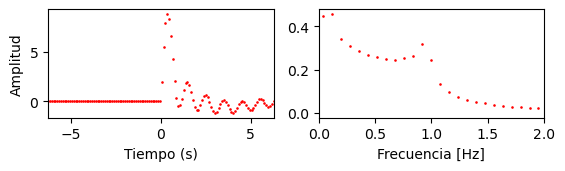

In [100]:
# para suavizar los espectros
import konno_ohmachi as ko

# suavizamos el espectro
espectro_suave = ko.faster_konno_ohmachi(espectro_amp, freq, n_cores=None)

# preparamos la grafica
fig1 = plt.figure(1)

ax1 = fig1.add_subplot(4,2,1)
ax1.scatter(t, x_sum, marker='.', s=3, c='red')
ax1.set_ylabel('Amplitud')
ax1.set_xlabel('Tiempo (s)')
ax1.set_xlim([-2*np.pi, 2*np.pi])

ax1 = fig1.add_subplot(4,2,4)
ax1.scatter(freq, espectro_suave, marker='.', s=3, c='red')
ax1.set_xlim([0, 2])
ax1.set_xlabel('Frecuencia [Hz]')


ax1 = fig1.add_subplot(4,2,4)
ax1.scatter(freq, espectro_suave, marker='.', s=3, c='red')
ax1.set_xlim([0, 2])
ax1.set_xlabel('Frecuencia [Hz]')


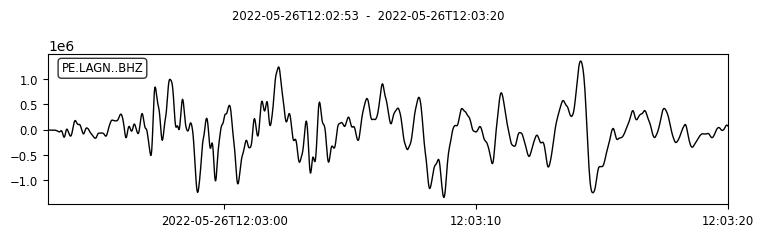

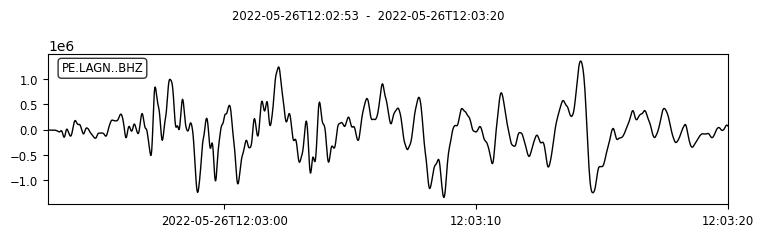

In [9]:
import obspy as obs
from obspy import UTCDateTime
s = obs.read('PE.LAGN..BHZ.D.2022.146')


t1 = UTCDateTime("2022-05-26T12:02:53.000")
t2 = UTCDateTime("2022-05-26T12:05:20.000")
s.plot(starttime=t1, endtime=t2)